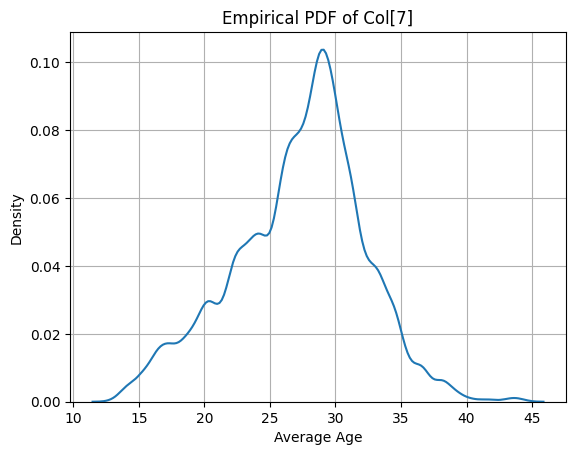

Statistic: 0.9883778242696424, p-value: 8.825739040912487e-12
数据似乎不服从正态分布 (拒绝零假设)


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 读取数据
data = pd.read_excel('HW1-ANOVA/data.xlsx')

# 提取第七列
col_7 = data.iloc[:, 6]  # Python索引从0开始，因此第七列是索引6

# 绘制经验概率密度函数
sns.kdeplot(col_7, bw_adjust=0.5)
plt.title('Empirical PDF of Col[7]')
plt.xlabel('Average Age')
plt.ylabel('Density')
plt.grid()
plt.show()

# 正态性检验
statistic, p_value = stats.shapiro(col_7)  # 使用Shapiro-Wilk检验
print(f'Statistic: {statistic}, p-value: {p_value}')

# 根据p值判断正态性
alpha = 0.05
if p_value > alpha:
    print("数据似乎服从正态分布 (不能拒绝零假设)")
else:
    print("数据似乎不服从正态分布 (拒绝零假设)")


In [2]:
import pandas as pd
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

# Read data
data = pd.read_excel('data.xlsx')

# Extract column 7 and categories
col_7 = data.iloc[:, 6]  # 7th column
categories = data['群类别']  # Assuming the category column is named 'category'

# Test normality for each category
for i in range(1, 6):  # Assuming categories are labeled from 1 to 5
    group = col_7[categories == i]
    statistic, p_value = stats.shapiro(group)  # Shapiro-Wilk test
    print(f'Category {i}: Statistic={statistic}, p-value={p_value}')
    if p_value > 0.05:
        print(f'Category {i} appears to be normally distributed (fail to reject H0)')
    else:
        print(f'Category {i} does not appear to be normally distributed (reject H0)')

# Test homogeneity of variances
groups = [col_7[categories == i] for i in range(1, 6)]
stat, p_value_var = stats.levene(*groups)  # Levene's test
print(f'Levene’s test: Statistic={stat}, p-value={p_value_var}')
if p_value_var > 0.05:
    print('Homogeneity of variances is assumed (fail to reject H0)')
else:
    print('Homogeneity of variances is not assumed (reject H0)')


Category 1: Statistic=0.9889177019317387, p-value=0.0010068367942714259
Category 1 does not appear to be normally distributed (reject H0)
Category 2: Statistic=0.9866028570038597, p-value=0.006910100085120613
Category 2 does not appear to be normally distributed (reject H0)
Category 3: Statistic=0.9894059994096522, p-value=0.15584690304319565
Category 3 appears to be normally distributed (fail to reject H0)
Category 4: Statistic=0.9838728658098733, p-value=0.00011372764101030563
Category 4 does not appear to be normally distributed (reject H0)
Category 5: Statistic=0.9546671623519278, p-value=4.544352530487091e-13
Category 5 does not appear to be normally distributed (reject H0)
Levene’s test: Statistic=61.01927977094263, p-value=9.677355333795493e-49
Homogeneity of variances is not assumed (reject H0)


ANOVA test statistic: 171.50703270711966, p-value: 1.0820916064752822e-126


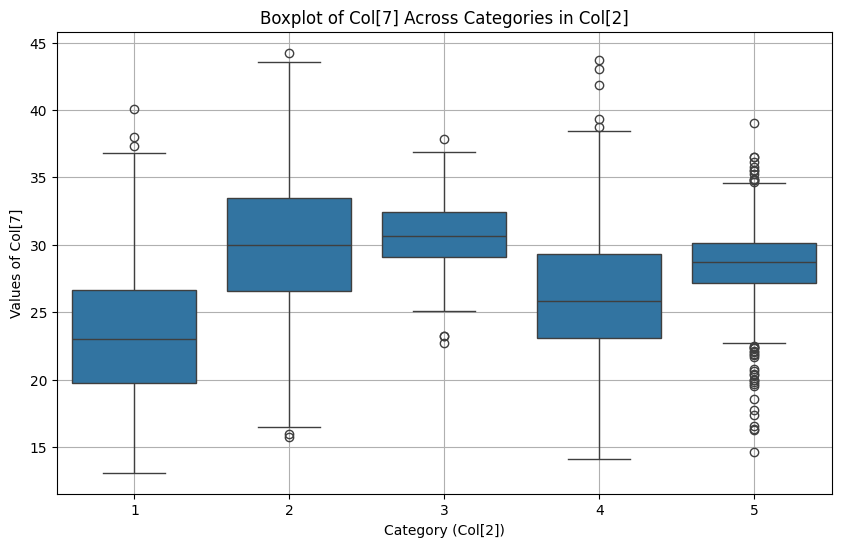

Significant difference between the means of the groups.


In [4]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_excel('data.xlsx')

# 提取第七列和类别标签 (假设类别在第二列)
col_7 = data.iloc[:, 6]  # 第七列
categories_col_2 = data.iloc[:, 1]  # 第二列

# 按类别分组
groups = [col_7[categories_col_2 == category] for category in categories_col_2.unique()]

# 执行单因素方差分析 (ANOVA)
stat, p_value = stats.f_oneway(*groups)
print(f'ANOVA test statistic: {stat}, p-value: {p_value}')

# 可视化数据
plt.figure(figsize=(10, 6))
sns.boxplot(x=categories_col_2, y=col_7)
plt.title('Boxplot of Col[7] Across Categories in Col[2]')
plt.xlabel('Category (Col[2])')
plt.ylabel('Values of Col[7]')
plt.grid()
plt.show()

# 结果解释
alpha = 0.05
if p_value > alpha:
    print("No significant difference between the means of the groups.")
else:
    print("Significant difference between the means of the groups.")


Genter Ratio: Shapiro-Wilk test statistic=0.9700647855544581, p-value=3.340881084764461e-20
Genter Ratio does not follow a normal distribution (reject null hypothesis).
Genter Ratio (Log Transformed): Shapiro-Wilk test statistic=0.9401479960286223, p-value=5.996121968819224e-28
Genter Ratio (Log Transformed) does not follow a normal distribution (reject null hypothesis).


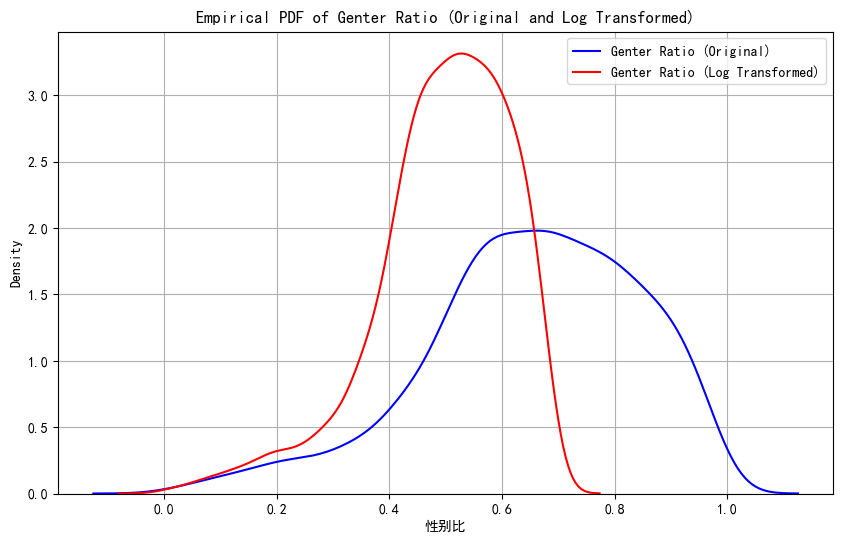

Mobile-phone Using ratio: Shapiro-Wilk test statistic=0.8555576497764631, p-value=9.829449763753064e-40
Mobile-phone Using ratio does not follow a normal distribution (reject null hypothesis).
Mobile-phone Using ratio (Log Transformed): Shapiro-Wilk test statistic=0.8839551311490682, p-value=1.3287954513517424e-36
Mobile-phone Using ratio (Log Transformed) does not follow a normal distribution (reject null hypothesis).


c:\Users\scpsyl\.conda\envs\pytorch\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


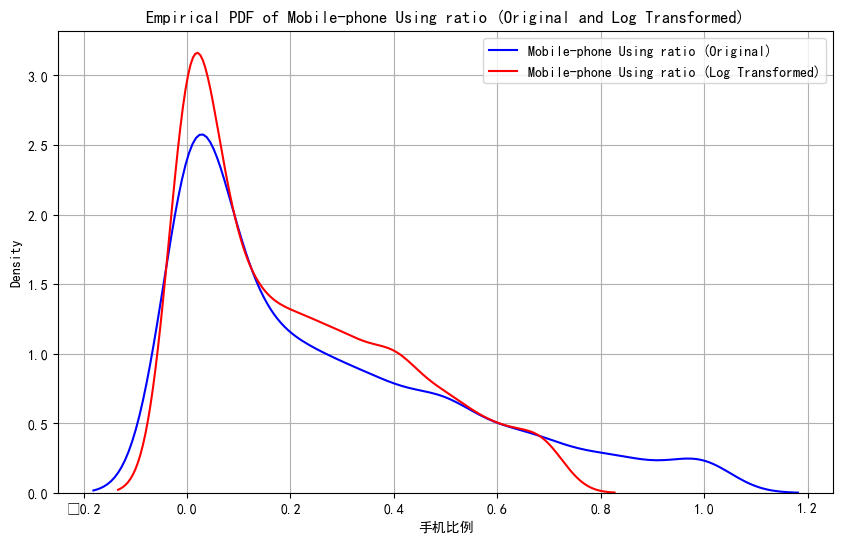

Night-chat ratio: Shapiro-Wilk test statistic=0.7385867210991983, p-value=6.815852538542055e-49
Night-chat ratio does not follow a normal distribution (reject null hypothesis).
Night-chat ratio (Log Transformed): Shapiro-Wilk test statistic=0.8090681687255978, p-value=6.41378882936199e-44
Night-chat ratio (Log Transformed) does not follow a normal distribution (reject null hypothesis).


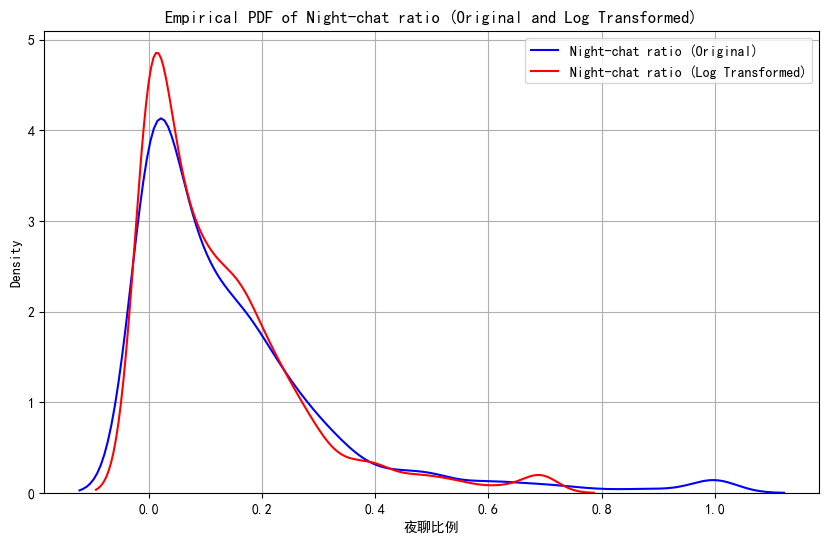

In [12]:
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# 读取数据
data = pd.read_excel('data.xlsx')

# 选择三列进行分析 (假设选择第3、4、5列作为额外的特征列)
columns = [5, 9, 12]  # 选择的列索引
column_names = ['Genter Ratio', 'Mobile-phone Using ratio', 'Night-chat ratio']

# 逐列绘制经验概率密度函数 (empirical PDF) 并进行正态性检验
for i, col in enumerate(columns):
    plt.figure(figsize=(10, 6))
    
    # 原始数据的经验概率密度函数
    sns.kdeplot(data.iloc[:, col], label=f'{column_names[i]} (Original)', color='blue')
    
    # 正态性检验
    stat, p_value = stats.shapiro(data.iloc[:, col])
    print(f'{column_names[i]}: Shapiro-Wilk test statistic={stat}, p-value={p_value}')
    
    if p_value > 0.05:
        print(f'{column_names[i]} follows a normal distribution (fail to reject null hypothesis).')
    else:
        print(f'{column_names[i]} does not follow a normal distribution (reject null hypothesis).')

    # 对应的对数变换
    log_transformed = np.log(data.iloc[:, col] + 1)  # +1 以避免log(0)
    
    # 绘制对数变换后的经验概率密度函数
    sns.kdeplot(log_transformed, label=f'{column_names[i]} (Log Transformed)', color='red')
    
    # 对数变换后的正态性检验
    stat_log, p_value_log = stats.shapiro(log_transformed)
    print(f'{column_names[i]} (Log Transformed): Shapiro-Wilk test statistic={stat_log}, p-value={p_value_log}')
    
    if p_value_log > 0.05:
        print(f'{column_names[i]} (Log Transformed) follows a normal distribution (fail to reject null hypothesis).')
    else:
        print(f'{column_names[i]} (Log Transformed) does not follow a normal distribution (reject null hypothesis).')

    # 可视化
    plt.title(f'Empirical PDF of {column_names[i]} (Original and Log Transformed)')
    plt.legend()
    plt.grid(True)
    plt.show()
